In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import time
from reg2HDFE import reg2HDFE

# Creating fake data

- unbalanced panel with time and firm fixed effects

In [2]:
nobs = 10000
tmax = 10
idmax = 100

In [3]:
x1 = np.random.standard_normal(nobs)
x2 = np.random.standard_normal(nobs)

t = np.random.choice(range(1,tmax+1), nobs)
i = np.random.choice(range(1,idmax+1), nobs)

teff = np.random.standard_normal(tmax)
ieff = np.random.standard_normal(idmax)

u = np.random.standard_normal(nobs)

y = x1 + 0.5*x2 + ieff[i-1] + teff[t-1] + u
# y = x1 + 0.5*x2 + ieff[i-1] + teff[t-1]

In [4]:
df = pd.DataFrame([i, t, y, x1, x2]).T
df.columns = ['i', 't', 'y', 'x1', 'x2']
df = df.sort_values(['i','t'])
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

df.i = df.i.astype('int32')
df.t = df.t.astype('int32')

In [5]:
gpmod = reg2HDFE(df, ['x1', 'x2'], 'y', 'i', 't')

In [6]:
gpmod.fit_pandas()
yhat_pandas = gpmod.yhat_pd
gpmod.fit_numpy()
yhat_numpy = gpmod.yhat_np

10 0.0
10 0.0


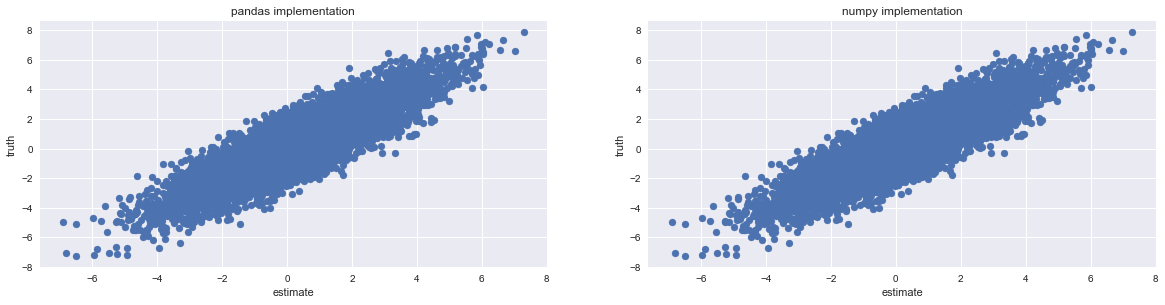

In [7]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
    
ax1.scatter(yhat_pandas, df.y)
ax1.set_title('pandas implementation')
ax1.set_xlabel('estimate')
ax1.set_ylabel('truth')

ax2.scatter(yhat_numpy, df.y)
ax2.set_title('numpy implementation')
ax2.set_xlabel('estimate')
ax2.set_ylabel('truth')

plt.show();

# Benchmarking

In [8]:
times_pandas = []
times_numpy = []

for j in range(30):
    start = time.time()
    gpmod.fit_pandas()
    end = time.time()
    times_pandas.append(end-start)
    
    start = time.time()
    gpmod.fit_numpy()
    end = time.time()
    times_numpy.append(end-start)

10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0
10 0.0


In [9]:
for idp, p in enumerate(times_pandas):
    print('{}. pandas: {}, numpy: {}'.format(idp, p, times_numpy[idp]))
    print('{}. pandas: {:0.3e}, numpy: {:0.3e}'.format(idp, p, times_numpy[idp]))

0. pandas: 0.10296034812927246, numpy: 0.006681203842163086
0. pandas: 1.030e-01, numpy: 6.681e-03
1. pandas: 0.11997151374816895, numpy: 0.017706871032714844
1. pandas: 1.200e-01, numpy: 1.771e-02
2. pandas: 0.10479187965393066, numpy: 0.005819082260131836
2. pandas: 1.048e-01, numpy: 5.819e-03
3. pandas: 0.10667705535888672, numpy: 0.006158590316772461
3. pandas: 1.067e-01, numpy: 6.159e-03
4. pandas: 0.09211444854736328, numpy: 0.012331008911132812
4. pandas: 9.211e-02, numpy: 1.233e-02
5. pandas: 0.08678388595581055, numpy: 0.006242036819458008
5. pandas: 8.678e-02, numpy: 6.242e-03
6. pandas: 0.08804798126220703, numpy: 0.020110368728637695
6. pandas: 8.805e-02, numpy: 2.011e-02
7. pandas: 0.09371495246887207, numpy: 0.0059435367584228516
7. pandas: 9.371e-02, numpy: 5.944e-03
8. pandas: 0.0869746208190918, numpy: 0.005972623825073242
8. pandas: 8.697e-02, numpy: 5.973e-03
9. pandas: 0.09705424308776855, numpy: 0.006174564361572266
9. pandas: 9.705e-02, numpy: 6.175e-03
10. pandas

# A bigger example

This shows that the numpy implementation can deal with

- 1 million observations
- ~ 10k groups
- ~ 100 time periods per group
- 100 variables

In [10]:
nobs = 1000000
tmax = 100
idmax = 10000
nx = 100

In [11]:
X = np.random.standard_normal((nobs, nx))

t = np.random.choice(range(1,tmax+1), nobs)
i = np.random.choice(range(1,idmax+1), nobs)

teff = np.random.standard_normal(tmax)
ieff = np.random.standard_normal(idmax)

u = np.random.standard_normal(nobs)

b = np.random.standard_normal(nx).reshape((nx,1))

In [12]:
y = X.dot(b) + ieff[i-1].reshape((nobs,1)) + teff[t-1].reshape((nobs,1)) + u.reshape((nobs,1))

In [13]:
df = pd.DataFrame(np.concatenate([i.reshape((nobs,1)), t.reshape((nobs,1)), y, X], axis=1))
df.columns = ['i', 't', 'y'] + ['x{}'.format(i+1) for i in range(nx)]
df = df.sort_values(['i','t'])
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

df.i = df.i.astype('int32')
df.t = df.t.astype('int32')

In [14]:
df.shape

(1000000, 103)

In [15]:
gpmod = reg2HDFE(df, ['x{}'.format(i+1) for i in range(nx)], 'y', 'i', 't')

In [16]:
gpmod.fit_numpy()
yhat_numpy = gpmod.yhat_np

10 2.3283064365386963e-10


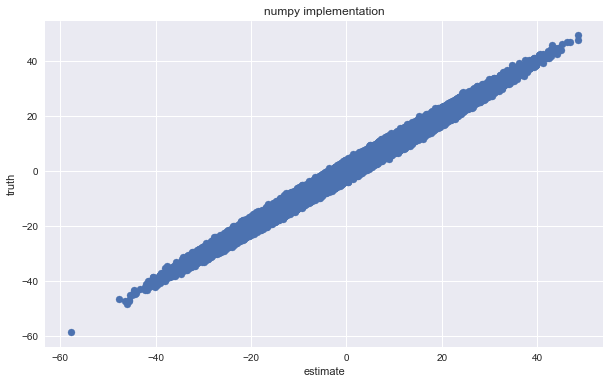

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(yhat_numpy, df.y)
plt.title('numpy implementation')
plt.xlabel('estimate')
plt.ylabel('truth')
plt.show();